In [239]:
import matplotlib.pyplot as plt 

import scipy.ndimage.filters

from skimage.transform import pyramid_laplacian

from PIL import Image
from PIL import ImageFilter

import numpy as np

In [240]:
def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()

In [241]:
class pyramid(object):
    g_data=[]
    l_data=[]
    
    def __init__(self,file_path,n=5):
        self.g_data=[]
        self.l_data=[]
        im = Image.open(file_path)
        prev=np.asarray(im,dtype=np.float64)/255.0
#         print(prev.shape)
        self.g_data.append(prev)
        
#         plt.imshow(prev, cmap="Greys_r")
#         plt.imshow(np.subtract(prev,self._blur(prev)),cmap="Greys_r")
        for i in range(n):
            the_blur=pyramid.blur(prev)
            diff=prev-the_blur
            self.l_data.append(diff)
            smaller=pyramid.subsample(the_blur)
            self.g_data.append(smaller)
            prev=smaller
            
        self.l_data.append(self.g_data[-1])
    
    
# A wrong way of making laplacian pyramids
#         rev =list(reversed(self.g_data))
#         for i in range(n):              
#             expanded=scipy.ndimage.interpolation.zoom(rev[i],2,order=0)
# #             print expanded.shape
#             expanded=self._blur(expanded)
#             diff=rev[i+1]-expanded
#             self.l_data.append(diff)
            
            
    @staticmethod
    def blur(img_arr):
#         kernel = generating_kernel(0.4)
#         return scipy.signal.convolve2d(img_arr,kernel,'same')
#         return skimage.filters.gaussian(img_arr,sigm=1)
        return scipy.ndimage.filters.gaussian_filter(img_arr, 1,order=1)
    
    @staticmethod
    def subsample(img_arr):
        sub_arr = img_arr[::2,::2]
        return sub_arr    
    
    @staticmethod
    def supersample(img_arr):
        new_arr=scipy.ndimage.interpolation.zoom(img_arr,2,order=0)
        for x in range(new_arr.shape[0]):
            if x%2==1:
                new_arr[:,x]=np.zeros(new_arr.shape[1])
        for y in range(new_arr.shape[1]):
            if y%2==1:
                new_arr[y,:]=np.zeros(new_arr.shape[0])
        return new_arr
      
    @staticmethod
    def reconstruct(lapl):
        rev_lapl =list(reversed(lapl))
        gauss=lapl[-1]
        for i in range(len(lapl)-1):
            up=pyramid.supersample(gauss)
            blurred=up
#             blurred=pyramid.blur(up)
            added=blurred+rev_lapl[i+1]
#             plt.imshow(rev_lepl[i+1])
            gauss=added
        return gauss
#             plt.figure()
#             plt.imshow(gauss,cmap="Greys_r")
            
#         plt.imshow(self._blur(self._supersample(lapl[-1])+lapl[-2]),cmap="Greys_r")
        

    
    def level(self,i):
        return self.g_data[i]
        
    def show(self,source):
        for i in range(len(source)):
            plt.figure()
            plt.imshow(source[i], cmap="Greys_r")
            
    def show_g(self):
        self.show(self.g_data)
        
    def show_l(self):
        self.show(self.l_data)

        

        
        
        
        

In [242]:
    def generating_kernel(a):
        w_1d = np.array([0.25 - a/2.0, 0.25, a, 0.25, 0.25 - a/2.0])
        return np.outer(w_1d, w_1d)
    
    def iexpand(image):
        out = None
        kernel = generating_kernel(0.4)
        outimage = np.zeros((image.shape[0]*2, image.shape[1]*2), dtype=np.float64)
        outimage[::2,::2]=image[:,:]
        out =4*pyramid.blur(outimage)
#         out = 4*scipy.signal.convolve2d(outimage,kernel,'same')
        return out
    
    def collapse(lapl_pyr):
        output = None
        output = np.zeros((lapl_pyr[0].shape[0],lapl_pyr[0].shape[1]), dtype=np.float64)
        for i in range(len(lapl_pyr)-1,0,-1):
            lap = iexpand(lapl_pyr[i])
            lapb = lapl_pyr[i-1]
            if lap.shape[0] > lapb.shape[0]:
                lap = np.delete(lap,(-1),axis=0)
            if lap.shape[1] > lapb.shape[1]:
                lap = np.delete(lap,(-1),axis=1)
            tmp = lap + lapb
            lapl_pyr.pop()
            lapl_pyr.pop()
            lapl_pyr.append(tmp)
            output = tmp
        return output

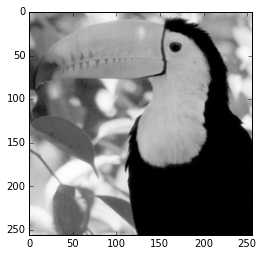

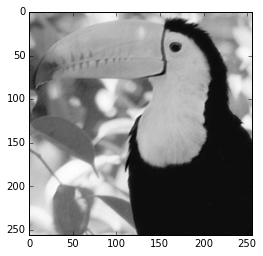

In [243]:
%matplotlib inline
p=pyramid("Images/Q1/toucan.tif")
image=np.asarray(Image.open("Images/Q1/toucan.tif"),dtype=np.float64)/255.0
# print(image[0][0])
# p.show_g()
# p.show_l()

laplacian=p.l_data
# new_image=pyramid.reconstruct(laplacian)
new_image=collapse(laplacian)
plt.figure()
plt.imshow(image,cmap="Greys_r")
# new_image=new_image/np.max(new_image)
plt.figure()
plt.imshow(new_image,cmap="Greys_r")


# print(p.l_data[0])
# x=np.array([[1,2],[3,4]])
# print(p._supersample(x))
    
# p._supersample(x)




# image=np.asarray(Image.open("Images/Q1/mandril.tif"),dtype=np.float64)/255.0
# # plt.imshow(image,cmap="Greys_r")
# thing=pyramid_laplacian(image, max_layer=-1, downscale=2, sigma=2, order=1, mode='reflect', cval=0)
# for x in thing:
#     print(x[0][0])
# #     plt.figure()
# #     plt.imshow(x, cmap="Greys_r")
#     break
# print(p.l_data[-1])
# print(p.l2_data[0][0][0])
# print np.asarray(Image.open("Images/Q1/lena_gray.gif"))
# p=g_pyramid("Images/Q1/lena_gray.gif")
# p.show_all()
# p.show_l()
# p.show_g()
# plt.imshow(p.level(-1), cmap="Greys_r")
